In [0]:
import math
import random

import numpy as np

import matplotlib.pyplot as plt

In [0]:
##### Constants #####

CYCLE_HRS = 24

SUBDIVISION_MINS = 3

PEAKS = ['8:30',
         '19:30']

PEAK_DURATION_MINS = 120

MAX_TRAFFIC_PER_SUBDIVISION = 300

#####################

In [0]:
def linear_mapping(val, lo1, hi1, lo2 = 0.0, hi2 = 1.0):
    return (val - lo1) * (hi2 - lo2) / (hi1 - lo1) + lo2

In [248]:
cycle_mins = CYCLE_HRS * 60

cycle_mins

1440

In [249]:
cycle_time_steps = list(range(0, cycle_mins, SUBDIVISION_MINS))

cycle_time_steps[100:115]

[300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342]

In [250]:
peaks = [peak.split(':') for peak in PEAKS]
peaks = [int(peak[0]) * 60 + int(peak[1]) for peak in peaks]

peaks

[510, 1170]

In [251]:
load = [random.randint(1 * SUBDIVISION_MINS, 10 * SUBDIVISION_MINS) for minute in cycle_time_steps]

load[:15]

[29, 23, 13, 28, 6, 16, 28, 20, 26, 20, 24, 3, 11, 28, 8]

In [0]:
def gaussian(x, height = MAX_TRAFFIC_PER_SUBDIVISION, peak = 100, amplitude = PEAK_DURATION_MINS // 4):
    return height * np.e ** (-1 * (((x - peak) ** 2) / (2 * amplitude ** 2)))


load_with_peaks = [
    sum(
        [
            random.randint(1 * SUBDIVISION_MINS, 10 * SUBDIVISION_MINS),
            gaussian(
                minute, 
                peak = min(peaks, key = lambda peak: abs(peak - minute))
            )
        ]
    )
    for minute
    in cycle_time_steps
]

In [253]:
time_steps = list(
    zip(
        *[
            [
                mins // SUBDIVISION_MINS, 
                f'{mins // 60:02d}:{mins % 60:02d}'
            ] 
            for mins 
            in range(0, cycle_mins, cycle_mins // 24)
        ]
    )
)

time_steps = list(map(list, time_steps))

time_steps[0] += [time_steps[0][-1] + time_steps[0][1]]
time_steps[1] += ['00:00']

list(zip(*time_steps[::-1]))

[('00:00', 0),
 ('01:00', 20),
 ('02:00', 40),
 ('03:00', 60),
 ('04:00', 80),
 ('05:00', 100),
 ('06:00', 120),
 ('07:00', 140),
 ('08:00', 160),
 ('09:00', 180),
 ('10:00', 200),
 ('11:00', 220),
 ('12:00', 240),
 ('13:00', 260),
 ('14:00', 280),
 ('15:00', 300),
 ('16:00', 320),
 ('17:00', 340),
 ('18:00', 360),
 ('19:00', 380),
 ('20:00', 400),
 ('21:00', 420),
 ('22:00', 440),
 ('23:00', 460),
 ('00:00', 480)]

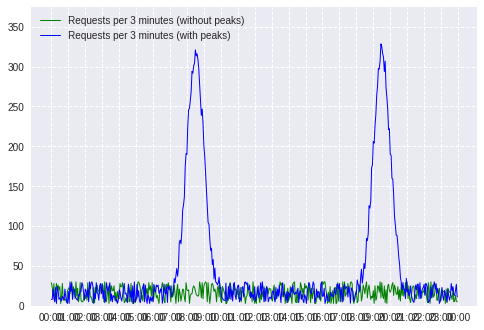

In [254]:
plt.plot(load,            color = 'g', linewidth = 1)
plt.plot(load_with_peaks, color = 'b', linewidth = 1)

plt.legend([
    f'Requests per {SUBDIVISION_MINS} minutes (without peaks)',
    f'Requests per {SUBDIVISION_MINS} minutes (with peaks)',
])

plt.ylim([0, MAX_TRAFFIC_PER_SUBDIVISION * 1.25])

plt.xticks(*time_steps)

plt.grid(True, linestyle = '--')

plt.show()